In [ ]:
!pip install -r requirements.txt

In [ ]:
from model.config import *
from model.ddpm_model import *
from data.CustomDataset import *
from run.run_script import *

In [2]:
print('---------loading dataset---------')
dataset = CustomImage(config.image_path)
loader = Get_DataLoader(dataset, DIP_Method=True)

---------loading dataset---------


with time step noise
  0 / 500 loss : 0.41734
Using SSIM get : 0.974698
 50 / 500 loss : 0.07568
Using SSIM get : 0.999687
100 / 500 loss : 0.04532
Using SSIM get : 0.999885
150 / 500 loss : 0.03729
Using SSIM get : 0.999909
200 / 500 loss : 0.02580
Using SSIM get : 0.999951
250 / 500 loss : 0.01980
Using SSIM get : 0.999971
300 / 500 loss : 0.01762
Using SSIM get : 0.999975
350 / 500 loss : 0.01397
Using SSIM get : 0.999988
400 / 500 loss : 0.01336
Using SSIM get : 0.999987
450 / 500 loss : 0.00989
Using SSIM get : 0.999994
(10, 128, 128, 1)


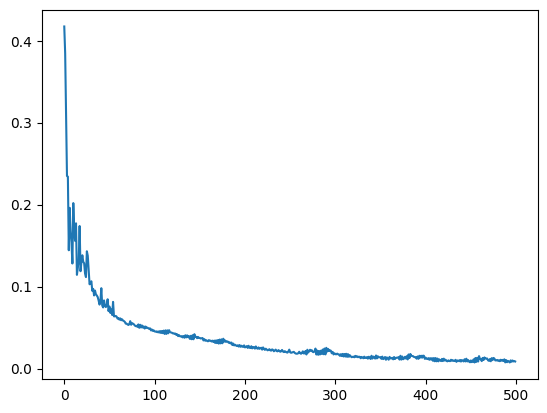

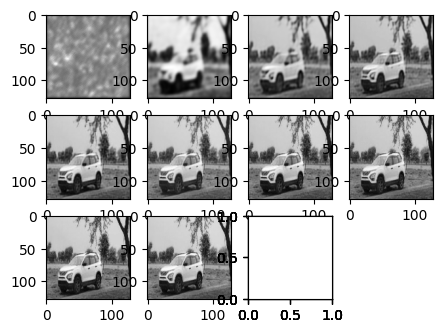

----------------------------
without time step noise
  0 / 500 loss : 0.62643
Using SSIM get : 0.939359
 50 / 500 loss : 0.07606
Using SSIM get : 0.999616
100 / 500 loss : 0.05213
Using SSIM get : 0.999808
150 / 500 loss : 0.04260
Using SSIM get : 0.999878
200 / 500 loss : 0.03238
Using SSIM get : 0.999913
250 / 500 loss : 0.03334
Using SSIM get : 0.999903
300 / 500 loss : 0.02397
Using SSIM get : 0.999940
350 / 500 loss : 0.01631
Using SSIM get : 0.999970
400 / 500 loss : 0.01345
Using SSIM get : 0.999982
450 / 500 loss : 0.01153
Using SSIM get : 0.999977
(10, 128, 128, 1)


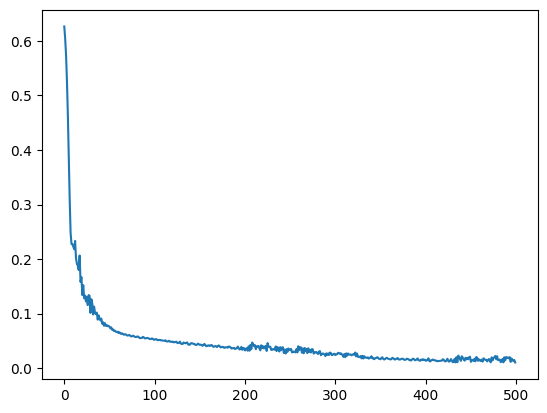

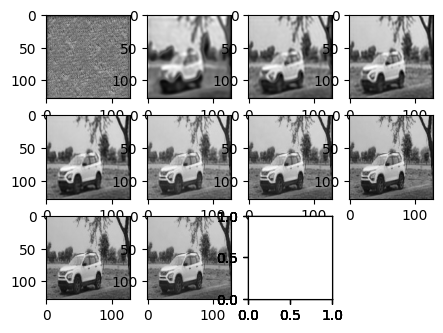

In [ ]:
print('with time step noise')
ddpm = DDPM(UNet(config.n_steps, DIP_Method=True), n_steps=config.n_steps, min_beta=config.min_beta, max_beta=config.max_beta, device=config.device, DIP_Method=True, time_step=True)
optimizer=torch.optim.Adam(ddpm.parameters(), config.lr)
train(ddpm, loader, config.epochs, optimizer, device=config.device, display=True)
print('----------------------------')
print('without time step noise')
ddpm = DDPM(UNet(config.n_steps, DIP_Method=True), n_steps=config.n_steps, min_beta=config.min_beta, max_beta=config.max_beta, device=config.device, DIP_Method=True, time_step=False)
optimizer=torch.optim.Adam(ddpm.parameters(), config.lr)
train(ddpm, loader, config.epochs, optimizer, device=config.device, display=True)


In [3]:
import numpy as np

learning_rate = np.arange(0.001, 0.021, 0.002)

In [4]:
def eval_lr(ddpms, learning_rate, origin_image, average_dict):

    gen_images = None
    for ddpm, lr in zip(ddpms, learning_rate):
        gen = generate_image(ddpm, n_samples=1)
        if gen_images == None: gen_images = gen
        else: gen_images = torch.cat((gen_images, gen), dim=0)
        sim = structural_similarity(gen.view(128, 128, 1).cpu().numpy(), origin_image.view(128, 128, 1).cpu().numpy(), data_range=255, channel_axis=2)
        average_dict[lr].append(sim)

    show_image(gen_images)

In [5]:
import statistics

average_dict = {}
for lr in learning_rate:
    average_dict[lr] = []

----------------------------------
different learning rate
current lr : 0.001
  0 / 100 loss : 0.30886
Using SSIM get : 0.982604
 50 / 100 loss : 0.10704
Using SSIM get : 0.998447
current lr : 0.003
  0 / 100 loss : 0.28931
Using SSIM get : 0.985927
 50 / 100 loss : 0.04910
Using SSIM get : 0.999839
current lr : 0.005
  0 / 100 loss : 0.31103
Using SSIM get : 0.984302
 50 / 100 loss : 0.05170
Using SSIM get : 0.999815
current lr : 0.007
  0 / 100 loss : 0.40059
Using SSIM get : 0.981549
 50 / 100 loss : 0.05197
Using SSIM get : 0.999788
current lr : 0.009000000000000001
  0 / 100 loss : 0.35973
Using SSIM get : 0.986953
 50 / 100 loss : 0.04171
Using SSIM get : 0.999894
current lr : 0.011
  0 / 100 loss : 0.34754
Using SSIM get : 0.986079
 50 / 100 loss : 0.07838
Using SSIM get : 0.999871
current lr : 0.013000000000000001
  0 / 100 loss : 0.25136
Using SSIM get : 0.989496
 50 / 100 loss : 0.04185
Using SSIM get : 0.999873
current lr : 0.015
  0 / 100 loss : 0.20732
Using SSIM get : 0.9

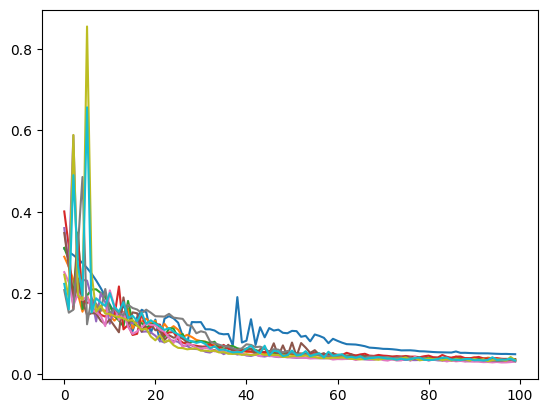

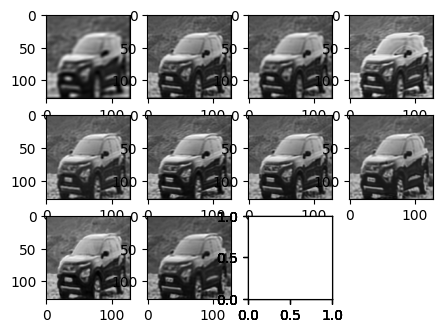

----------------------------------
different learning rate
current lr : 0.001
  0 / 100 loss : 0.55158
Using SSIM get : 0.953129
 50 / 100 loss : 0.10894
Using SSIM get : 0.998831
current lr : 0.003
  0 / 100 loss : 0.41162
Using SSIM get : 0.974480
 50 / 100 loss : 0.05768
Using SSIM get : 0.999659
current lr : 0.005
  0 / 100 loss : 0.53121
Using SSIM get : 0.961039
 50 / 100 loss : 0.04846
Using SSIM get : 0.999801
current lr : 0.007
  0 / 100 loss : 0.58959
Using SSIM get : 0.956301
 50 / 100 loss : 0.06353
Using SSIM get : 0.999618
current lr : 0.009000000000000001
  0 / 100 loss : 0.46133
Using SSIM get : 0.975892
 50 / 100 loss : 0.05676
Using SSIM get : 0.999731
current lr : 0.011
  0 / 100 loss : 0.45890
Using SSIM get : 0.985701
 50 / 100 loss : 0.05730
Using SSIM get : 0.999572
current lr : 0.013000000000000001
  0 / 100 loss : 0.52604
Using SSIM get : 0.966491
 50 / 100 loss : 0.05882
Using SSIM get : 0.999640
current lr : 0.015
  0 / 100 loss : 0.55707
Using SSIM get : 0.9

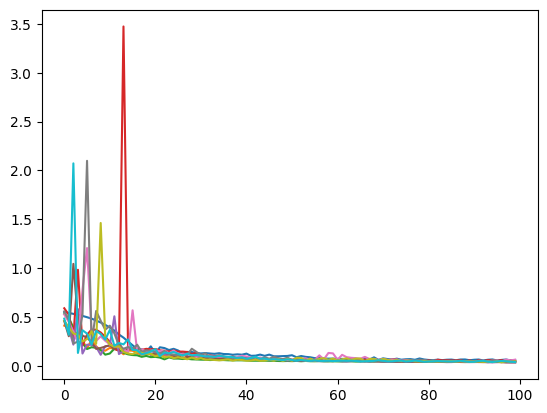

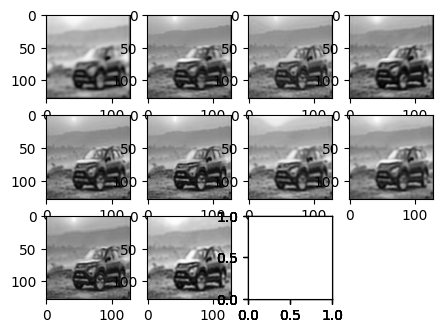

----------------------------------
different learning rate
current lr : 0.001
  0 / 100 loss : 0.66974
Using SSIM get : 0.936435
 50 / 100 loss : 0.09591
Using SSIM get : 0.999326
current lr : 0.003
  0 / 100 loss : 0.64569
Using SSIM get : 0.942599
 50 / 100 loss : 0.08715
Using SSIM get : 0.999631
current lr : 0.005
  0 / 100 loss : 0.69263
Using SSIM get : 0.944301
 50 / 100 loss : 0.07575
Using SSIM get : 0.999544
current lr : 0.007
  0 / 100 loss : 0.71459
Using SSIM get : 0.934102
 50 / 100 loss : 0.05993
Using SSIM get : 0.999611
current lr : 0.009000000000000001
  0 / 100 loss : 0.80456
Using SSIM get : 0.921745
 50 / 100 loss : 0.09054
Using SSIM get : 0.999680
current lr : 0.011
  0 / 100 loss : 0.66043
Using SSIM get : 0.955147
 50 / 100 loss : 0.06656
Using SSIM get : 0.999658
current lr : 0.013000000000000001
  0 / 100 loss : 0.72286
Using SSIM get : 0.954372
 50 / 100 loss : 0.06547
Using SSIM get : 0.999525
current lr : 0.015
  0 / 100 loss : 0.85930
Using SSIM get : 0.9

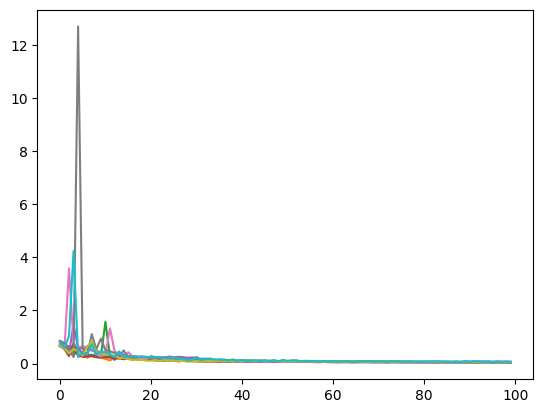

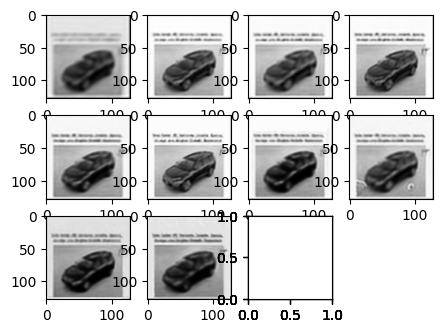

----------------------------------
different learning rate
current lr : 0.001
  0 / 100 loss : 0.48221
Using SSIM get : 0.965732
 50 / 100 loss : 0.06187
Using SSIM get : 0.999664
current lr : 0.003
  0 / 100 loss : 0.44363
Using SSIM get : 0.971867
 50 / 100 loss : 0.05452
Using SSIM get : 0.999738
current lr : 0.005
  0 / 100 loss : 0.29127
Using SSIM get : 0.987041
 50 / 100 loss : 0.04506
Using SSIM get : 0.999866
current lr : 0.007
  0 / 100 loss : 0.38894
Using SSIM get : 0.982552
 50 / 100 loss : 0.04844
Using SSIM get : 0.999828
current lr : 0.009000000000000001
  0 / 100 loss : 0.37385
Using SSIM get : 0.983981
 50 / 100 loss : 0.04003
Using SSIM get : 0.999883
current lr : 0.011
  0 / 100 loss : 0.31687
Using SSIM get : 0.988777
 50 / 100 loss : 0.04372
Using SSIM get : 0.999816
current lr : 0.013000000000000001
  0 / 100 loss : 0.44228
Using SSIM get : 0.978129
 50 / 100 loss : 0.05388
Using SSIM get : 0.999559
current lr : 0.015
  0 / 100 loss : 0.44471
Using SSIM get : 0.9

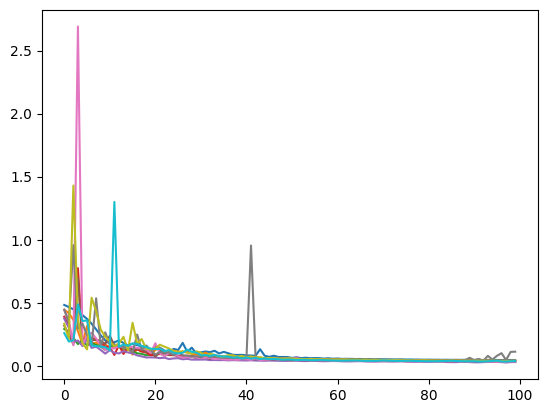

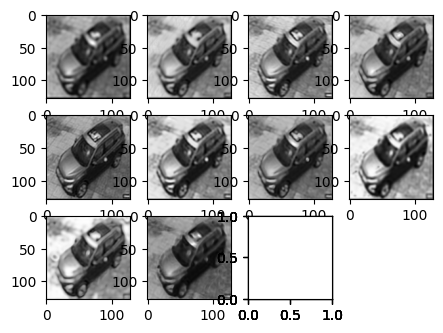

----------------------------------
different learning rate
current lr : 0.001
  0 / 100 loss : 0.57074
Using SSIM get : 0.952492
 50 / 100 loss : 0.07657
Using SSIM get : 0.999585
current lr : 0.003
  0 / 100 loss : 0.38068
Using SSIM get : 0.980529
 50 / 100 loss : 0.05149
Using SSIM get : 0.999797
current lr : 0.005
  0 / 100 loss : 0.45526
Using SSIM get : 0.972723
 50 / 100 loss : 0.04287
Using SSIM get : 0.999877
current lr : 0.007
  0 / 100 loss : 0.45814
Using SSIM get : 0.970461
 50 / 100 loss : 0.04203
Using SSIM get : 0.999849
current lr : 0.009000000000000001
  0 / 100 loss : 0.42226
Using SSIM get : 0.991965
 50 / 100 loss : 0.05044
Using SSIM get : 0.999829
current lr : 0.011
  0 / 100 loss : 0.51664
Using SSIM get : 0.995688
 50 / 100 loss : 0.04799
Using SSIM get : 0.999723
current lr : 0.013000000000000001
  0 / 100 loss : 0.52782
Using SSIM get : 0.970075
 50 / 100 loss : 0.04577
Using SSIM get : 0.999865
current lr : 0.015
  0 / 100 loss : 0.35412
Using SSIM get : 0.9

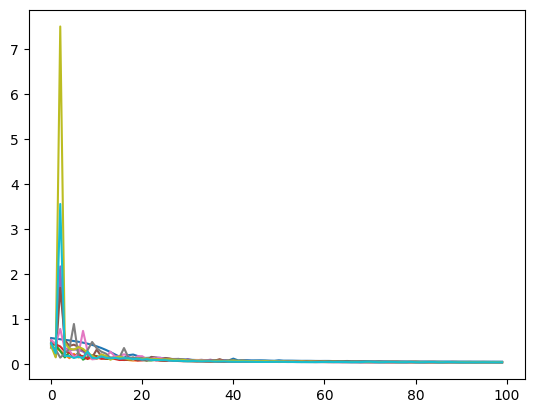

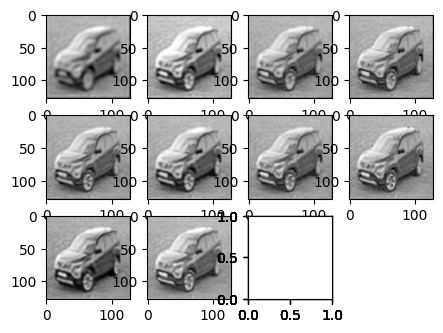

----------------------------------
different learning rate
current lr : 0.001
  0 / 100 loss : 0.25041
Using SSIM get : 0.988923
 50 / 100 loss : 0.05624
Using SSIM get : 0.999792
current lr : 0.003
  0 / 100 loss : 0.23994
Using SSIM get : 0.991125
 50 / 100 loss : 0.04413
Using SSIM get : 0.999900
current lr : 0.005
  0 / 100 loss : 0.21519
Using SSIM get : 0.994011
 50 / 100 loss : 0.05065
Using SSIM get : 0.999808
current lr : 0.007
  0 / 100 loss : 0.24309
Using SSIM get : 0.992113
 50 / 100 loss : 0.04221
Using SSIM get : 0.999883
current lr : 0.009000000000000001
  0 / 100 loss : 0.21360
Using SSIM get : 0.993553
 50 / 100 loss : 0.03958
Using SSIM get : 0.999905
current lr : 0.011
  0 / 100 loss : 0.37547
Using SSIM get : 0.986886
 50 / 100 loss : 0.06654
Using SSIM get : 0.999665
current lr : 0.013000000000000001
  0 / 100 loss : 0.21385
Using SSIM get : 0.995656
 50 / 100 loss : 0.03459
Using SSIM get : 0.999930
current lr : 0.015
  0 / 100 loss : 0.36764
Using SSIM get : 0.9

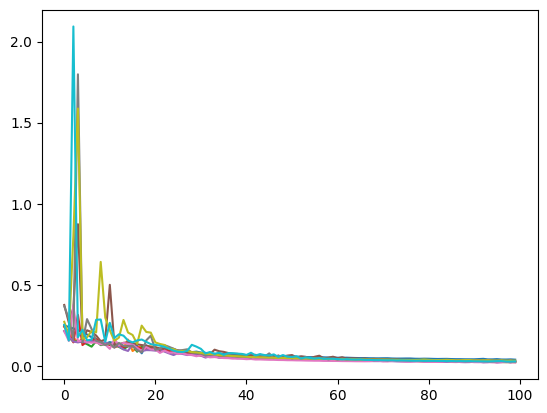

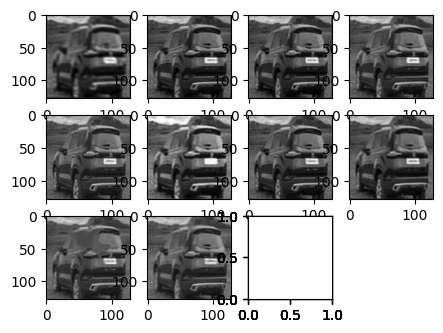

----------------------------------
different learning rate
current lr : 0.001
  0 / 100 loss : 0.33534
Using SSIM get : 0.979285
 50 / 100 loss : 0.06109
Using SSIM get : 0.999732
current lr : 0.003
  0 / 100 loss : 0.41332
Using SSIM get : 0.973006
 50 / 100 loss : 0.05890
Using SSIM get : 0.999712
current lr : 0.005
  0 / 100 loss : 0.45012
Using SSIM get : 0.970259
 50 / 100 loss : 0.05267
Using SSIM get : 0.999848
current lr : 0.007
  0 / 100 loss : 0.33672
Using SSIM get : 0.982130
 50 / 100 loss : 0.05339
Using SSIM get : 0.999848
current lr : 0.009000000000000001
  0 / 100 loss : 0.42345
Using SSIM get : 0.977679
 50 / 100 loss : 0.04436
Using SSIM get : 0.999848
current lr : 0.011
  0 / 100 loss : 0.37340
Using SSIM get : 0.977600
 50 / 100 loss : 0.05184
Using SSIM get : 0.999752
current lr : 0.013000000000000001
  0 / 100 loss : 0.41962
Using SSIM get : 0.974693
 50 / 100 loss : 0.05474
Using SSIM get : 0.999845
current lr : 0.015
  0 / 100 loss : 0.35373
Using SSIM get : 0.9

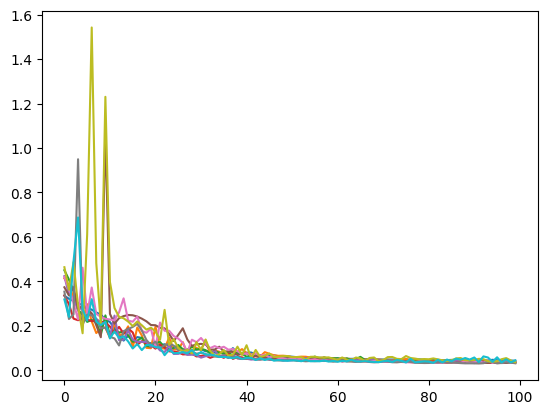

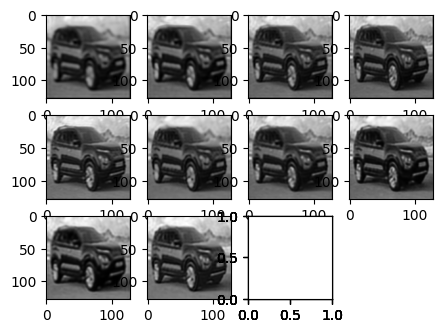

----------------------------------
different learning rate
current lr : 0.001
  0 / 100 loss : 0.45950
Using SSIM get : 0.965886
 50 / 100 loss : 0.09344
Using SSIM get : 0.999058
current lr : 0.003
  0 / 100 loss : 0.49966
Using SSIM get : 0.962871
 50 / 100 loss : 0.09220
Using SSIM get : 0.998960
current lr : 0.005
  0 / 100 loss : 0.50032
Using SSIM get : 0.964984
 50 / 100 loss : 0.08468
Using SSIM get : 0.999597
current lr : 0.007
  0 / 100 loss : 0.47666
Using SSIM get : 0.968267
 50 / 100 loss : 0.06013
Using SSIM get : 0.999705
current lr : 0.009000000000000001
  0 / 100 loss : 0.44368
Using SSIM get : 0.974743
 50 / 100 loss : 0.06676
Using SSIM get : 0.999597
current lr : 0.011
  0 / 100 loss : 0.43800
Using SSIM get : 0.978105
 50 / 100 loss : 0.06292
Using SSIM get : 0.999672
current lr : 0.013000000000000001
  0 / 100 loss : 0.43202
Using SSIM get : 0.985001
 50 / 100 loss : 0.06071
Using SSIM get : 0.999704
current lr : 0.015
  0 / 100 loss : 0.39484
Using SSIM get : 0.9

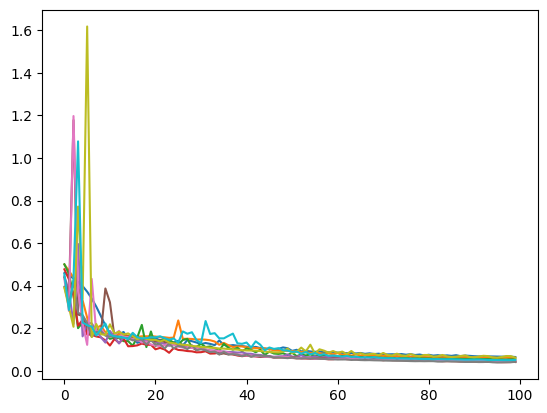

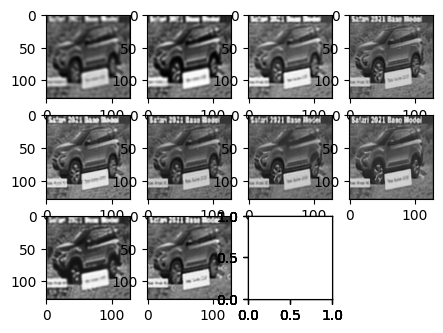

----------------------------------
different learning rate
current lr : 0.001
  0 / 100 loss : 0.51497
Using SSIM get : 0.957528
 50 / 100 loss : 0.10981
Using SSIM get : 0.999052
current lr : 0.003
  0 / 100 loss : 0.49861
Using SSIM get : 0.965479
 50 / 100 loss : 0.06277
Using SSIM get : 0.999728
current lr : 0.005
  0 / 100 loss : 0.42135
Using SSIM get : 0.972500
 50 / 100 loss : 0.07555
Using SSIM get : 0.999314
current lr : 0.007
  0 / 100 loss : 0.43071
Using SSIM get : 0.977633
 50 / 100 loss : 0.06846
Using SSIM get : 0.999567
current lr : 0.009000000000000001
  0 / 100 loss : 0.42110
Using SSIM get : 0.972599
 50 / 100 loss : 0.05775
Using SSIM get : 0.999722
current lr : 0.011
  0 / 100 loss : 0.45922
Using SSIM get : 0.970628
 50 / 100 loss : 0.05289
Using SSIM get : 0.999726
current lr : 0.013000000000000001
  0 / 100 loss : 0.42260
Using SSIM get : 0.979698
 50 / 100 loss : 0.06073
Using SSIM get : 0.999653
current lr : 0.015
  0 / 100 loss : 0.47466
Using SSIM get : 0.9

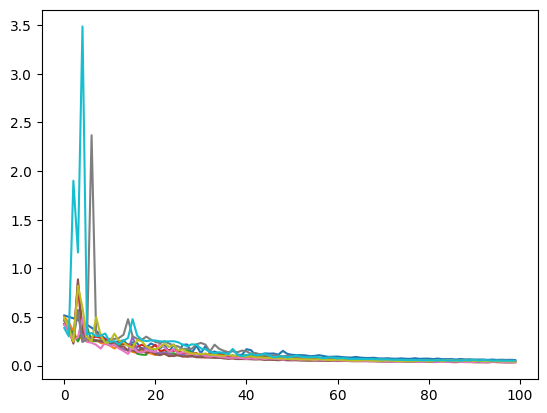

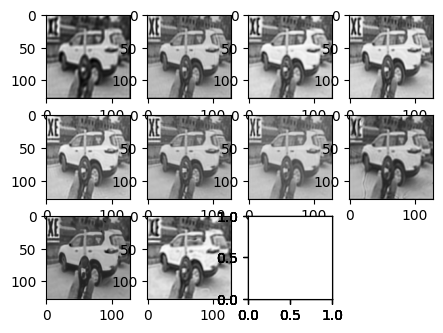

----------------------------------
different learning rate
current lr : 0.001
  0 / 100 loss : 0.19019
Using SSIM get : 0.991298
 50 / 100 loss : 0.07483
Using SSIM get : 0.999247
current lr : 0.003
  0 / 100 loss : 0.18579
Using SSIM get : 0.992937
 50 / 100 loss : 0.05398
Using SSIM get : 0.999620
current lr : 0.005
  0 / 100 loss : 0.32075
Using SSIM get : 0.981086
 50 / 100 loss : 0.05212
Using SSIM get : 0.999626
current lr : 0.007
  0 / 100 loss : 0.22144
Using SSIM get : 0.989624
 50 / 100 loss : 0.04599
Using SSIM get : 0.999805
current lr : 0.009000000000000001
  0 / 100 loss : 0.21266
Using SSIM get : 0.991681
 50 / 100 loss : 0.06378
Using SSIM get : 0.999535
current lr : 0.011
  0 / 100 loss : 0.37120
Using SSIM get : 0.981154
 50 / 100 loss : 0.05183
Using SSIM get : 0.999774
current lr : 0.013000000000000001
  0 / 100 loss : 0.20279
Using SSIM get : 0.990970
 50 / 100 loss : 0.06113
Using SSIM get : 0.999738
current lr : 0.015
  0 / 100 loss : 0.22590
Using SSIM get : 0.9

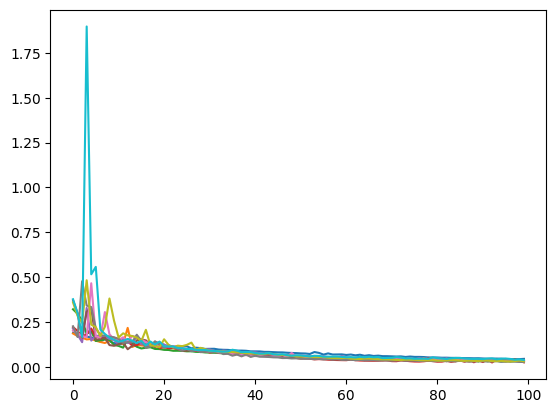

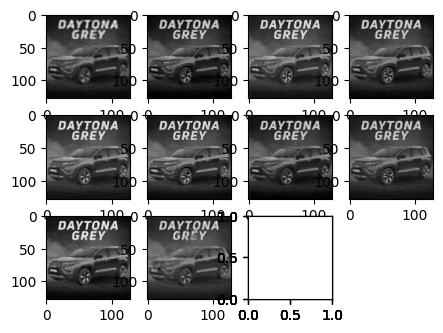

lr : 0.0010, average ssim : 0.999783
lr : 0.0030, average ssim : 0.999867
lr : 0.0050, average ssim : 0.999877
lr : 0.0070, average ssim : 0.999872
lr : 0.0090, average ssim : 0.999885
lr : 0.0110, average ssim : 0.999880
lr : 0.0130, average ssim : 0.999868
lr : 0.0150, average ssim : 0.999839
lr : 0.0170, average ssim : 0.999837
lr : 0.0190, average ssim : 0.999808


In [7]:

for _ in range(10):

    dataset = CustomImage(config.image_path)
    loader = Get_DataLoader(dataset, DIP_Method=True)
    print('----------------------------------')
    print('different learning rate')
    ddpms = []
    for lr in learning_rate:
        print(f'current lr : {lr}')
        ddpm = DDPM(UNet(config.n_steps, DIP_Method=True), n_steps=config.n_steps, min_beta=config.min_beta, max_beta=config.max_beta, device=config.device, DIP_Method=True, time_step=True)
        optimizer=torch.optim.Adam(ddpm.parameters(), lr)
        train(ddpm, loader, 100, optimizer, device=config.device, display=False)
        ddpms.append(ddpm)

    eval_lr(ddpms, learning_rate, next(iter(loader)), average_dict)


for item in average_dict.items():
    print(f'lr : {item[0]:.4f}, average ssim : {statistics.mean(item[1]):.6f}')
